In [1]:
2+2

4

# Python Extensions

## IPyVolume

In [2]:
import ipyvolume
ipyvolume.examples.ball(rmax=3, rmin=2.5, shape=32, lighting=True)

/usr/lib/python3.8/site-packages/ipyvolume/serialize.py:92: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0] ** 2 + gradient[1] ** 2 + gradient[2] ** 2)


Volume(data=array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0.,…

In [3]:
ds = ipyvolume.datasets.aquariusA2.fetch()
v = ipyvolume.quickvolshow(ds.data.T, lighting=True,
                     level=[0.3, 0.4, 0.9], opacity=[0.03, 0.2, 0.1])
display(v)

## GeoJSON

In [4]:
from IPython.display import GeoJSON

GeoJSON({
    "type": "Feature",
    "geometry": {
        "type": "Point",
        "coordinates": [-118.4563712, 34.0163116]
    }
})

<IPython.display.GeoJSON object>

## Math rendering test

$$f(x) = \int_{-\infty}^\infty
    \hat f(\xi)\,e^{2 \pi i \xi x}
    \,d\xi$$

$$
\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}
$$

$$f'(a) = \lim_{x \to a} \frac{f(x) - f(a)}{x-a}$$
$$
\mathbf{J}
=
\frac{d \mathbf{f}}{d \mathbf{x}}
=
\left[ \frac{\partial \mathbf{f}}{\partial x_1}
\cdots \frac{\partial \mathbf{f}}{\partial x_n} \right]
=
\begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \cdots &
\frac{\partial f_1}{\partial x_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial f_m}{\partial x_1} & \cdots &
\frac{\partial f_m}{\partial x_n}
\end{bmatrix}
$$


In [26]:
%%latex
\begin{aligned}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{aligned}

<IPython.core.display.Latex object>

## Algorithmx

In [5]:
import algorithmx

canvas = algorithmx.jupyter_canvas()

canvas.nodes([1, 2]).add()
canvas.edge((1, 2)).add()

display(canvas)

JupyterClient(events=['{"type": "update", "queue": "default", "data": {"attributes": {"nodes": {"1": {"visible…

## Bokeh example
https://github.com/bokeh/bokeh/issues/10002 - will fail if markdown is bokeh

In [6]:
import bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.sampledata.iris import flowers

colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
colors = [colormap[x] for x in flowers['species']]

p = figure(title = "Iris Morphology")
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Petal Width'

p.circle(flowers["petal_length"], flowers["petal_width"],
         color=colors, fill_alpha=0.2, size=10)

output_notebook()

show(p)

Loading BokehJS ...

In [7]:
import numpy as np
import bokeh

bokeh.sampledata.download()

from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_file, show
from bokeh.sampledata.stocks import AAPL, GOOG, IBM, MSFT

def datetime(x):
    return np.array(x, dtype=np.datetime64)

p1 = figure(x_axis_type="datetime", title="Stock Closing Prices")
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(datetime(AAPL['date']), AAPL['adj_close'], color='#A6CEE3', legend_label='AAPL')
p1.line(datetime(GOOG['date']), GOOG['adj_close'], color='#B2DF8A', legend_label='GOOG')
p1.line(datetime(IBM['date']), IBM['adj_close'], color='#33A02C', legend_label='IBM')
p1.line(datetime(MSFT['date']), MSFT['adj_close'], color='#FB9A99', legend_label='MSFT')
p1.legend.location = "top_left"

aapl = np.array(AAPL['adj_close'])
aapl_dates = np.array(AAPL['date'], dtype=np.datetime64)

window_size = 30
window = np.ones(window_size)/float(window_size)
aapl_avg = np.convolve(aapl, window, 'same')

p2 = figure(x_axis_type="datetime", title="AAPL One-Month Average")
p2.grid.grid_line_alpha = 0
p2.xaxis.axis_label = 'Date'
p2.yaxis.axis_label = 'Price'
p2.ygrid.band_fill_color = "olive"
p2.ygrid.band_fill_alpha = 0.1

p2.circle(aapl_dates, aapl, size=4, legend_label='close',
          color='darkgrey', alpha=0.2)

p2.line(aapl_dates, aapl_avg, legend_label='avg', color='navy')
p2.legend.location = "top_left"

output_notebook()

show(gridplot([[p1,p2]], plot_width=400, plot_height=400))  # open a browser

Using data directory: /home/user/.bokeh/data
Skipping 'CGM.csv' (checksum match)
Skipping 'US_Counties.zip' (checksum match)
Skipping 'us_cities.json' (checksum match)
Skipping 'unemployment09.csv' (checksum match)
Skipping 'AAPL.csv' (checksum match)
Skipping 'FB.csv' (checksum match)
Skipping 'GOOG.csv' (checksum match)
Skipping 'IBM.csv' (checksum match)
Skipping 'MSFT.csv' (checksum match)
Skipping 'WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip' (checksum match)
Skipping 'gapminder_fertility.csv' (checksum match)
Skipping 'gapminder_population.csv' (checksum match)
Skipping 'gapminder_life_expectancy.csv' (checksum match)
Skipping 'gapminder_regions.csv' (checksum match)
Skipping 'world_cities.zip' (checksum match)
Skipping 'airports.json' (checksum match)
Skipping 'movies.db.zip' (checksum match)
Skipping 'airports.csv' (checksum match)
Skipping 'routes.csv' (checksum match)
Skipping 'haarcascade_frontalface_default.xml' (checksum match)


Loading BokehJS ...

## Bqplot

In [8]:
import numpy as np
from scipy.stats import norm

from ipywidgets import FloatSlider, HBox, VBox
import bqplot.pyplot as plt
x = np.linspace(-10, 10, 200)
y = norm.pdf(x)

# plot the gaussian density
title_tmpl = 'Gaussian Density (mu = {} and sigma = {})'
pdf_fig = plt.figure(title=title_tmpl.format(0, 1))
pdf_line = plt.plot(x, y, 'm', stroke_width=3)

# use two sliders to represent mu and sigma
mu_slider = FloatSlider(description='mu', value=0, min=-5, max=5, step=.1)
sigma_slider = FloatSlider(description='sigma', value=1, min=0.1, max=5, step=.1)

slider_layout = HBox([mu_slider, sigma_slider])

def update_density(change):
    new_mu = mu_slider.value
    new_sigma = sigma_slider.value
    # update the y attribute of the plot with the new pdf
    # computed using new mu and sigma values
    pdf_line.y = norm.pdf(x, new_mu, new_sigma)
    
    # also update the fig title
    pdf_fig.title = title_tmpl.format(new_mu, new_sigma)

# register the above callback with the 'value' trait of the sliders
for slider in [mu_slider, sigma_slider]:
    slider.observe(update_density, 'value')
    
# now put all the widgets together into a simple dashboard
# the plot should update now when the slider values are updated!
final_layout = VBox([pdf_fig, slider_layout])
final_layout

## Ipycanvas

In [9]:
from ipycanvas import MultiCanvas
m = MultiCanvas(n_canvases=3, width=200, height=200)
def draw_square(canvas, pos, width, color):
    canvas.fill_style = color
    canvas.fill_rect(pos, pos, width, width)
draw_square(m[0], 0, 200, 'orange')
m

MultiCanvas(height=200, width=200)

## Ipysheet

In [10]:
import numpy as np
from traitlets import link
from ipywidgets import HBox
import bqplot.pyplot as plt
from ipysheet import sheet, cell, column

size = 18
scale = 100.
np.random.seed(0)
x_data = np.arange(size)
y_data = np.cumsum(np.random.randn(size)  * scale)

fig = plt.figure()
axes_options = {'x': {'label': 'Date', 'tick_format': '%m/%d'},
                'y': {'label': 'Price', 'tick_format': '0.0f'}}

scatt = plt.scatter(x_data, y_data, colors=['red'], stroke='black')
fig.layout.width = '70%'

sheet1 = sheet(rows=size, columns=2)
x_column = column(0, x_data)
y_column = column(1, y_data)

link((scatt, 'x'), (x_column, 'value'))
link((scatt, 'y'), (y_column, 'value'))

HBox((fig, sheet1))

## Ipympl

In [11]:
# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Testing matplotlib interactions with a simple plot
fig = plt.figure()
plt.plot(np.sin(np.linspace(0, 20, 100)));

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Pythreejs

In [14]:
from pythreejs import *
from IPython.display import display
from math import pi
# Reduce repo churn for examples with embedded state:
from pythreejs._example_helper import use_example_model_ids
use_example_model_ids()

In [15]:
BoxGeometry(
    width=5, 
    height=10, 
    depth=15,
    widthSegments=5, 
    heightSegments=10,
    depthSegments=15)

Preview(child=BoxGeometry(depth=15.0, depthSegments=15, height=10.0, heightSegments=10, width=5.0, widthSegmen…

In [16]:
IcosahedronGeometry(radius=10, _flat=True)

Preview(child=IcosahedronGeometry(radius=10.0), shadowMap=WebGLShadowMap())

In [17]:
WireframeGeometry(geometry=TorusBufferGeometry(
    radius=20,
    tube=5,
    radialSegments=6,
    tubularSegments=20,
    arc=2.0*pi
))

Preview(child=WireframeGeometry(geometry=TorusBufferGeometry(radialSegments=6, radius=20.0, tube=5.0, tubularS…

## Qgrid

In [18]:
import qgrid
import pandas as pd
import numpy as np
randn = np.random.randn

# Set this pandas option to prevent the grid from being too big
pd.set_option('display.max_rows', 8)

# Get a pandas DataFrame containing the daily prices for the S&P 500 from 1/1/2011 - 1/1/2014
from pandas_datareader.data import get_data_yahoo
spy = get_data_yahoo(
    symbols='SPY',  
    start=pd.Timestamp('2011-01-01'),  
    end=pd.Timestamp('2014-01-01'),
    adjust_price=True,
)
qgrid.show_grid(spy)

/usr/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Seaborn

In [19]:
%matplotlib inline
import numpy as np
import pandas as pd

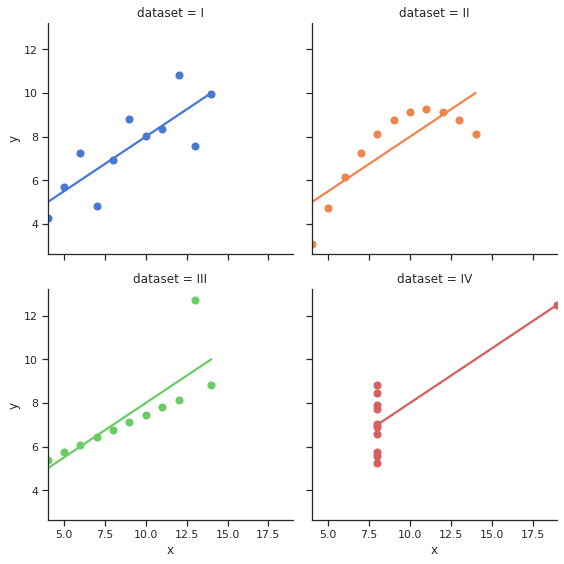

In [20]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})



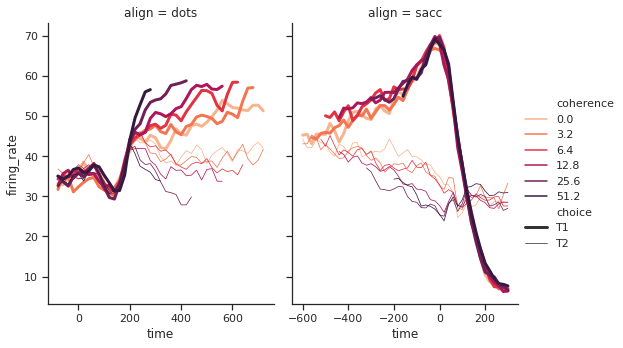

In [21]:
import seaborn as sns
sns.set(style="ticks")

dots = sns.load_dataset("dots")

# Define a palette to ensure that colors will be
# shared across the facets
palette = dict(zip(dots.coherence.unique(),
                   sns.color_palette("rocket_r", 6)))

# Plot the lines on two facets
sns.relplot(x="time", y="firing_rate",
            hue="coherence", size="choice", col="align",
            size_order=["T1", "T2"], palette=palette,
            height=5, aspect=.75, facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dots)

## Ipython-sql

In [22]:
%load_ext sql

In [23]:
%sql sqlite://

In [24]:
%sql create table(foo=integer)

 * sqlite://
(sqlite3.OperationalError) near "(": syntax error
[SQL: create table(foo=integer)]
(Background on this error at: http://sqlalche.me/e/e3q8)
